In [91]:
#### bag of words

import numpy as np
import pandas as pd

with open("feature_construction_output_old.csv") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip().split(",") for x in content]
flattenedset = list(set([val for sublist in content for val in sublist]))
mapping = {}
maps = enumerate(flattenedset)
## mapping event to index
for i,a in maps:
    mapping[a] = i

train = list()
labels = np.zeros(len(content))
for listing in content:

    seq = np.zeros(len(flattenedset))
    for i in range(0,len(listing)):
        if i ==0:
            continue
        else:
            seq[mapping[listing[i]]] = seq[mapping[listing[i]]]+1
#     print(seq)
    train.append(seq)
    labels[i-1] = listing[0]
sequences = np.array(train)

In [92]:
sequences.shape

(3487, 5133)

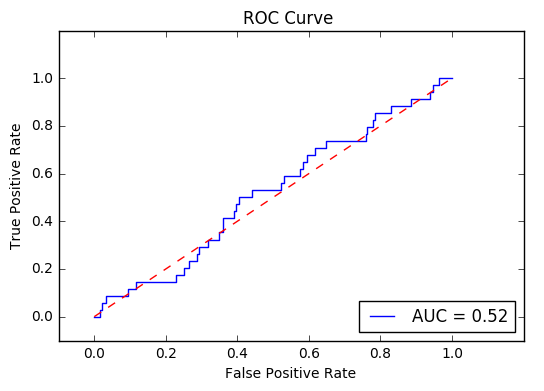

In [93]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

dataSize = len(labels)
ind = np.random.permutation(dataSize)
nTest = int(0.20 * dataSize)

test_indices = ind[:nTest]
train_indices = ind[nTest:]

train_set_x = sequences[train_indices]
train_set_y = labels[train_indices]
test_set_x = sequences[test_indices]
test_set_y = labels[test_indices]



logistic = LogisticRegression()
logistic.fit(train_set_x, train_set_y)
pred = logistic.decision_function(test_set_x)
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_set_y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('ROC Curve ')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False,
                            n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
rf.fit(train_set_x, train_set_y)

pred = rf.predict_proba(train_set_x)[:,1]
false_positive_ratein, true_positive_ratein, thresholds = roc_curve(train_set_y, pred)
pred2 = rf.predict_proba(test_set_x)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_set_y, pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_aucin = auc(false_positive_ratein, true_positive_ratein)
print (np.mean(cross_val_score(rf, sequences, labels, cv=10)))

plt.title('ROC Curve ')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.plot(false_positive_ratein, true_positive_ratein, 'green',label='AUC = %0.2f'% roc_aucin)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
print (np.mean(cross_val_score(rf, sequences, labels, cv=10)))


0.96186127853


In [68]:
a['U_gru']

array([[-0.05501676,  0.08507064,  0.08787768, ..., -0.08666971,
        -0.02956244, -0.06337715],
       [-0.08420485,  0.14092667, -0.05683822, ..., -0.04276124,
         0.23512152, -0.01787003],
       [ 0.09531654,  0.04945541,  0.1079405 , ..., -0.00465665,
        -0.04654342,  0.05524869],
       ..., 
       [-0.07333235, -0.09149445, -0.06375022, ..., -0.14676589,
         0.02244437,  0.08802024],
       [-0.09652098, -0.05500998,  0.02559228, ...,  0.09707076,
        -0.33103266, -0.11322088],
       [ 0.07295729, -0.02026245,  0.0957513 , ...,  0.01947108,
         0.07349804, -0.06793858]], dtype=float32)